In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import kagglehub
path = kagglehub.dataset_download("zalando-research/fashionmnist")

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape,y_val.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


NameError: name 'x_val' is not defined

In [ ]:
(x_val,y_val)=(x_train[50000:],y_train[50000:])

In [ ]:
print(x_val.shape,y_val.shape)

(10000, 28, 28) (10000,)


In [ ]:
print(y_train[5])

2


In [ ]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# Define class labels for FashionMNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define the transform used for training/validation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Get a batch of images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Unnormalize images for display (convert from [-1, 1] to [0, 1])
images = images * 0.5 + 0.5

# Plot the images with their class names
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.flatten()

for i in range(16):
    image = images[i].squeeze()  # remove channel dim (1,28,28) → (28,28)
    label = labels[i].item()

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(classes[label])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


NameError: name 'torch' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Lenet(nn.Module):
    def __init__(self, num_classes):
        super(Lenet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
        self.activate1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.activate2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
        self.activate3 = nn.ReLU()


        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(in_features=120, out_features=84)
        self.activate4 = nn.ReLU()
        self.linear2 = nn.Linear(in_features=84, out_features=num_classes)


    def forward(self, x):
        x = F.pad(x, (2, 2, 2, 2))
        x = self.conv1(x)
        x = self.activate1(x)
        x = self.pool1(x)

        x=self.conv2(x)
        x=self.activate2(x)
        x=self.pool2(x)

        x=self.conv3(x)
        x=self.activate3(x)

        x=self.flatten(x)
        x=self.linear1(x)
        x=self.activate4(x)
        x=self.linear2(x)

        return x





device=torch.device('cuda' if torch.cuda.is_available() else 'cpu' )

model=Lenet(10).to(device)
model

Lenet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (activate1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (activate2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (activate3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (activate4): ReLU()
  (linear2): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1) / 255.0
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1) / 255.0
y_val_tensor = torch.tensor(y_test, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1) / 255.0
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

val_size=int(0.1*len(train_dataset))

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Data preprocessing complete. DataLoaders created.")

Data preprocessing complete. DataLoaders created.


In [ ]:
#coding the training loop
import torch.optim as optim

current_loss=0


loss_calc=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

num_epochs=5

for epoch in range(num_epochs):
    model.train()
    current_loss=0
    for images,label in train_loader:
        images,label=images.to(device),label.to(device)

          #clearing past gradients
        optimizer.zero_grad()

        #forward pass

        output=model(images)




        #loss
        loss=loss_calc(output,label)



        #loss back propagation
        loss.backward()

         #update parameters
        optimizer.step()

        current_loss+=loss.item()* images.size(0)


    # print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {current_loss/len(train_loader):.4f}")
    avg_train_loss = current_loss / len(train_loader.dataset)

    model.eval()
    val_loss = 0

    with torch.no_grad():
        for images, label in val_loader:
            images, label = images.to(device), label.to(device)
            output = model(images)
            loss = loss_calc(output, label)
            val_loss += loss.item() * images.size(0)

    avg_val_loss = val_loss / len(val_loader.dataset)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}")






Epoch [1/5], Train Loss: 0.0440, Val Loss: 0.0449
Epoch [2/5], Train Loss: 0.0401, Val Loss: 0.0362
Epoch [3/5], Train Loss: 0.0476, Val Loss: 0.0277
Epoch [4/5], Train Loss: 0.0357, Val Loss: 0.0409
Epoch [5/5], Train Loss: 0.0374, Val Loss: 0.0362


In [ ]:
model.eval()  # Set to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to track gradients
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 90.01%


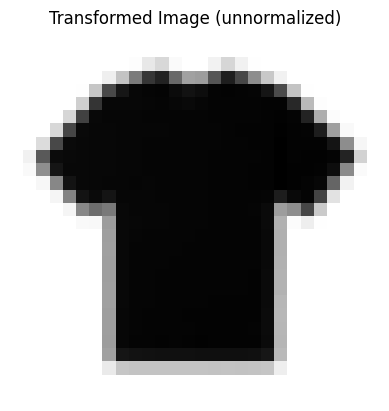

5
Predicted class: Sandal


In [ ]:
#testing model on real photo

from PIL import Image
import torchvision.transforms as transforms
import torch

# Define transform (must match your training preprocessing)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure grayscale
    transforms.Resize((28, 28)),                  # Resize to FashionMNIST size
    transforms.ToTensor(),                        # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))          # Normalize to [-1, 1]
])

# Load the image
image_path = "v.png"  # Change this to your actual image path
img = Image.open(image_path)

# Apply the transform
img_tensor = transform(img).unsqueeze(0)  # Shape: [1, 1, 28, 28]

################# View Image
img_unnorm = img_tensor * 0.5 + 0.5  # reverse normalization

# Convert to numpy, squeeze channel dimension
img_np = img_unnorm.squeeze().cpu().numpy()

# Plot
plt.imshow(img_np, cmap='gray')
plt.title("Transformed Image (unnormalized)")
plt.axis('off')
plt.show()

# Move to the same device as model
img_tensor = img_tensor.to(device)

# Set model to evaluation mode
model.eval()

# Make prediction
with torch.no_grad():
    output = model(img_tensor)
    predicted_class = output.argmax(dim=1).item()

print(predicted_class)
print(f"Predicted class:",classes[predicted_class])
